# Constraints on the PBH abundance

Compute the forecasted bounds on the PBH abundance for several future experiments

In [1]:
from Source.flux_stuff import *
from Source.event_rate import *
from Source.chi2 import *
import matplotlib as mpl

# gamma ray PBH bound, from Carr et al 2020 (write elsewhere, and check if it is at 90 CL)
def boundgamma_DM(M):
    ep = 0.2
    return 2.e-8*(M/5e14)**(3+ep)

def boundgamma_evap(M):
    ep = 0.2
    return 3.e-27*(M/5e14)**(-5./2.-2.*ep)

# bound on beta', See Carr 2020 review
def boundcmb_ani(M):
    if M>=2.5e13 and M<= 2.4e14:
        return 3.e-30*(M/1e13)**(3.1)
    else:
        return None

boundcmb_ani = np.vectorize(boundcmb_ani)
    
def plot_pbh_bounds(Mpbhs, fpbhs, is_DM):

    exps = ["SK", "HK", "JUNO", "DUNE"]
    exps = ["SK", "HK", "JUNO", "DUNE", "DARWIN", "ARGO"]
    cols = ["b", "r", "orange", "g", "yellow", "cyan"]

    #exps = ["HK", "JUNO", "DUNE"]
    #cols = ["r", "orange", "g"]

    # Compute fluxes (comment if already computed)
    #compute_flux(Mpbhs, fpbhs, is_DM)  # fpbhs not used here actually

    fig, ax = plt.subplots(figsize=(9,6))

    # Compute the bound for each experiment considered
    for ie, exp in enumerate(exps):
        print(exp)

        # Compute event rate
        compute_events(Mpbhs, fpbhs, exp, is_DM)  # fpbhs not used here actually

        chitab, fpbh_bounds = compute_chi2_2D_mod(Mpbhs, fpbhs, exp, is_DM)
        
        if is_DM:
            plt.plot(Mpbhs/1e15, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie])
        else:
            plt.plot(Mpbhs, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie])
       
    if is_DM:

        #mm, ff = np.loadtxt("Xenon_Limit_HighMasses.csv",delimiter=",",unpack=True)
        #plt.plot(mm/1e15, ff, color="y", linestyle="--", lw=4, label=r"DARWIN")
        #mm, ff = np.loadtxt("Argon_Limit_HighMasses.csv",delimiter=",",unpack=True)
        #plt.plot(mm/1e15, ff, color="y", linestyle=":", lw=4, label=r"ARGO")

        plt.plot(Mpbhs/1e15, boundgamma_DM(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
        
    else:
        plt.plot(Mpbhs, boundgamma_evap(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
        #plt.plot(Mpbhs, boundcmb_ani(Mpbhs), color="m", linestyle="--", lw=4, label=r"CMB")

        
    if is_DM:
        plt.ylabel(r'$  f_{\rm PBH} $')
        plt.xlabel(r'$ M_{\rm PBH} $'+' [$10^{15}$ g]')
        plt.xlim(Mpbhs[0]/1e15, Mpbhs[-1]/1e15)
        sufix = "DM"
        #plt.xscale("log")
    else:
        plt.ylabel(r"$  \beta' $")
        plt.xlabel(r'$ M_{\rm PBH} $'+' [g]')
        plt.xlim(Mpbhs[0], Mpbhs[-1])
        sufix = "evaporated"
        plt.xscale("log")

    plt.legend()#loc='lower right',frameon=False)
    plt.ylim(fpbhs[0], fpbhs[-1])
    plt.yscale("log")
    plt.tick_params(axis='both', which='both', top=True, right=True, direction="in")
    plt.grid(which="major",linestyle=":",linewidth=1)

    plt.tight_layout()
    plt.savefig("figures/PBH_bounds_"+sufix+".png", bbox_inches='tight', dpi=300)
    plt.show()


## Compute bounds on the abundance of PBHs as Dark Matter

SK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


HK
JUNO


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


DUNE


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )


DARWIN


/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integr

ARGO


/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


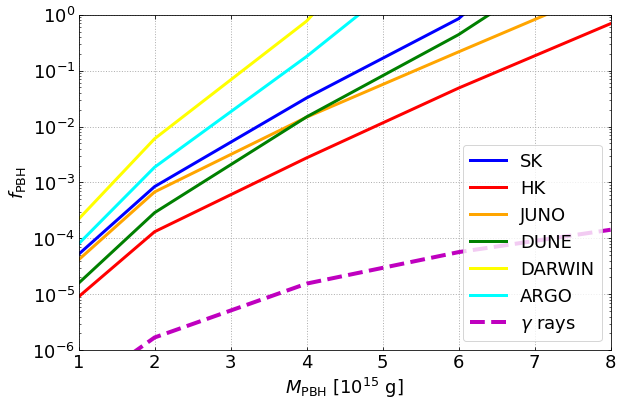

In [2]:
Mpbhs = np.array([1.e15, 2.e15, 4.e15, 6.e15, 8.e15])
#Mpbhs = np.logspace(np.log10(5.e14), np.log10(8.e15), 15)[1:]
fpbhs = np.logspace(-6, 0, 20)

plot_pbh_bounds(Mpbhs, fpbhs, is_DM=True)

## Compute bounds on the primordial abundance of evaporated PBHs

SK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


HK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


JUNO


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


DUNE


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


DARWIN


/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning:

ARGO


/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/event_rate.py:253: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+bin )[0] )
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning:

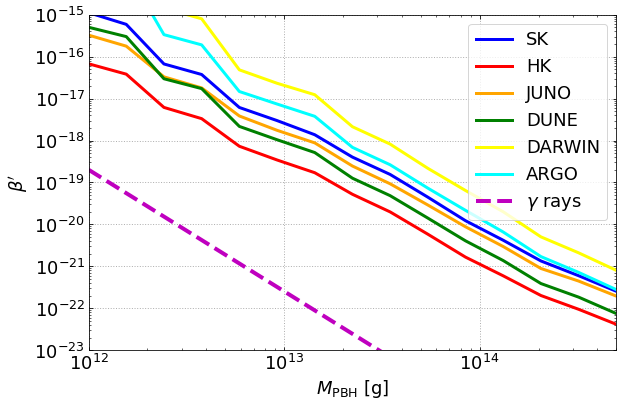

In [3]:
#Mpbhs = np.array([1.e12, 1.e13, 1.e14, 1.e15])
Mpbhs = np.logspace(np.log10(1.e12), np.log10(5.e14), 15)
betas = np.logspace(-23, -15, 20)

plot_pbh_bounds(Mpbhs, betas, is_DM=False)